In [3]:
from bs4 import BeautifulSoup
import requests
import lxml
import time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [73]:
# actual URL for our website
url = "https://enbek.kz/kk/search/vacancy?except[subsidized]=subsidized&languages[00000%2446%D0%90%D0%9D%D0%93%D0%9B]=00000%2446%D0%90%D0%9D%D0%93%D0%9B&languages[00000%2446%D0%9A%D0%90%D0%97]=00000%2446%D0%9A%D0%90%D0%97"

# for website to not think that we are some kind of bot
headers = {
    "accept": "*/*",
    "user-agent":  "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36"
}

# To store the attributes into these lists
titles = []
fields = []
salaries = []
locations = []
cities = []
experiences = []
enrollment_statuses = []
educations = []
dates = []




# method for web scraping
def scraping_page(url):
    # Requests
    req = requests.get(url, headers = headers)
    src = req.text

    # Now we can start doing our scraping
    soup = BeautifulSoup(src, "lxml")

    # Our essential info is in this class
    jobs = soup.find(class_="row").find_all(class_="item-list")




    # With loops because we got a lot of info to pull
    for jobs in jobs:

        #Because there might not be an info, therefore, we use exceptions
        try:
            title = jobs.find(class_="me-1").find("a",class_="stretched").text.strip()
        except AttributeError:
            title = np.nan

        try:
            field = jobs.find(class_="profobl").find("span").text.strip()
        except AttributeError:
            field = np.nan

        try:
            salary = jobs.find(class_="price").text.strip()
        except AttributeError:
            salary = np.nan

        try:
            location = jobs.find("li", class_="company d-flex align-items-center is-valid").text.strip()
        except AttributeError:
            location = np.nan

        try: 
            city = jobs.find("li", class_="location d-flex align-items-center me-lg-3").text.strip()
        except AttributeError:
            city = np.nan

        try:
            experience = jobs.find("li", class_="experience d-flex align-items-center").text.strip()
        except AttributeError:
            experience = np.nan

        try: 
            enrollment_status = jobs.find("li", class_="time d-flex align-items-center me-lg-3").text.strip()
        except AttributeError:
            enrollment_status = np.nan

        try:
            education = jobs.find("li", class_="education d-flex align-items-center").text.strip()
        except AttributeError:
            education = np.nan

        try:
            date = jobs.find("div", class_="right-content ms-lg-auto").find("span").text.strip()
        except AttributeError:
            date = np.nan


        # Now we store our info into previous lists by order
        titles.append(title)
        fields.append(field)
        salaries.append(salary)
        locations.append(location)
        cities.append(city)
        experiences.append(experience)
        enrollment_statuses.append(enrollment_status)
        educations.append(education)
        dates.append(date)


# Due to having a lot of pages, we have to do them one-by-one, by calling our method
for page_num in range(1, 32):
    #We can just add page number at the end
    page_url = f"{url}&page={page_num}"
    scraping_page(page_url)
    # It is essential to wait some time before actions, because a website may restrict its access
    time.sleep(2)




In [75]:
# Transforming data to DataFrame and saving it to csv 
data = pd.DataFrame({
    'Titles': titles,
    'Fields': fields,
    'Salaries': salaries,
    'Locations': locations,
    'Cities': cities,
    'Experiences': experiences,
    'Enrollment_statuses': enrollment_statuses,
    'Educations': educations,
    'Dates': dates
})

data.to_csv('enbek.csv', index=False)

In [5]:
# Load raw data
data = pd.read_csv('enbek.csv')

# Check for missing values
print(data.isnull().sum())

# If salary is null then we can assume that it does not pay
data['Salaries'].fillna(0,inplace = True)
# If education is null then we can assume that it does not any education
data['Educations'].fillna('Any',inplace = True)
# If field is null then we can assume that it does not fit any field
data['Fields'].fillna('No Field',inplace = True)
data['Enrollment_statuses'].fillna('Unknown',inplace = True)

Titles                 0
Fields                 4
Salaries               5
Locations              0
Cities                 0
Experiences            0
Enrollment_statuses    5
Educations             1
Dates                  0
dtype: int64


In [6]:
print(data.isnull().sum())

Titles                 0
Fields                 0
Salaries               0
Locations              0
Cities                 0
Experiences            0
Enrollment_statuses    0
Educations             0
Dates                  0
dtype: int64


In [7]:
data

,Titles,Fields,Salaries,Locations,Cities,Experiences,Enrollment_statuses,Educations,Dates
0,Тілдік пәндер саласындағы ЖОО оқытушысы,Білім беру және тәрбиелеу,от 95 000 до 150 000 тг.,"""Каспий өңірі ""Болашақ"" колледжі"" Жауапкершілі...","Маңғыстау облысы, Ақтау қ.",3 жыл жұмыс өтілі,толық жұмыс күні,жоғары,26.10.2024 жарияланды
1,Ресепшн қызметкері,Тұру және тамақтану,от 100 000 до 180 000 тг.,The Smart Space,"Шымкент қ., Тұран ауданы",Еңбек өтілі жоқ,ауысымды,жалпы орта (1 сыныптан 11/12 сыныптарға дейін),25.10.2024 жарияланды
2,Сәулетші-дизайнер,Құрылыс және сәулет,100 000 тг. бастап,"""QAZ07"" жауапкершілігі шектеулі серіктестігі","Батыс Қазақстан облысы, Орал қ.",Еңбек өтілі жоқ,толық жұмыс күні,техникалық және кәсіби,25.10.2024 жарияланды
3,SMM-менеджер,Маркетинг және БАҚ,100 000 тг. бастап,"""QAZ07"" жауапкершілігі шектеулі серіктестігі","Батыс Қазақстан облысы, Орал қ.",Еңбек өтілі жоқ,толық жұмыс күні,техникалық және кәсіби,25.10.2024 жарияланды
4,Әкімшілік хатшысы,HR және хатшылық,100 000 тг. бастап,"""QAZ07"" жауапкершілігі шектеулі серіктестігі","Батыс Қазақстан облысы, Орал қ.",Еңбек өтілі жоқ,толық емес жұмыс күні,техникалық және кәсіби,25.10.2024 жарияланды
...,...,...,...,...,...,...,...,...,...
305,Шетел тілі мұғалімі,Білім беру және тәрбиелеу,0,ИП Жансая Жанатбеккызы,"Алматы қ., Әуезов ауданы",Еңбек өтілі жоқ,Unknown,техникалық және кәсіби,10.09.2024 жарияланды
306,Тіл мектебінің мұғалімі,Білім беру және тәрбиелеу,0,"ИП "" Жамал А.Қ ""","Шымкент қ., Қаратау ауданы",Еңбек өтілі жоқ,Unknown,жалпы орта (1 сыныптан 11/12 сыныптарға дейін),10.09.2024 жарияланды
307,Заңгер,No Field,85 000 тг. бастап,"Қазақстан Республикасындағы ""ҚМГ Қашаған Б.В.""...",Астана қ.,2 жыл жұмыс өтілі,толық жұмыс күні,жоғары,09.09.2024 жарияланды
308,Іс қағаздарын жүргізуші,HR және хатшылық,от 85 000 до 100 000 тг.,"Шымкент қаласы білім басқармасының ""№144 жалпы...","Шымкент қ., Қаратау ауданы",1 жыл жұмыс өтілі,толық жұмыс күні,жоғары,06.09.2024 жарияланды


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titles               310 non-null    object
 1   Fields               310 non-null    object
 2   Salaries             310 non-null    object
 3   Locations            310 non-null    object
 4   Cities               310 non-null    object
 5   Experiences          310 non-null    object
 6   Enrollment_statuses  310 non-null    object
 7   Educations           310 non-null    object
 8   Dates                310 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB
None


In [9]:
# So Salaries column got some troubles, because it uses from and to strings. So we need to get rid of them

import re

def extract_mean(s):
    # Ensure the input is a string
    s = str(s)
    
    # Use regex to find all numbers in the string
    numbers = re.findall(r'\d+\s*\d*', s)
    
    # Remove spaces and convert to integers
    numbers = [int(num.replace(" ", "")) for num in numbers]
    
    # Determine what to return based on the number of extracted values
    if len(numbers) == 2:
        # Calculate mean if there are two numbers
        return sum(numbers) / len(numbers)
    elif len(numbers) == 1:
        # Return the single number if only one exists
        return numbers[0]
    else:
        # Return None if no numbers found
        return 0

# Apply the function to Salaries column
data['Salaries'] = data['Salaries'].apply(extract_mean)
data['Salaries'] = data['Salaries'].astype(int)
data['Experiences'] = data['Experiences'].apply(extract_mean)
data['Salaries'] = data['Salaries'].astype(int)


data['Dates'] = data['Dates'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')
data['Cities'] = data['Cities'].str.split(',').str[0]

In [10]:
data

,Titles,Fields,Salaries,Locations,Cities,Experiences,Enrollment_statuses,Educations,Dates
0,Тілдік пәндер саласындағы ЖОО оқытушысы,Білім беру және тәрбиелеу,122500,"""Каспий өңірі ""Болашақ"" колледжі"" Жауапкершілі...",Маңғыстау облысы,3,толық жұмыс күні,жоғары,26.10.2024
1,Ресепшн қызметкері,Тұру және тамақтану,140000,The Smart Space,Шымкент қ.,0,ауысымды,жалпы орта (1 сыныптан 11/12 сыныптарға дейін),25.10.2024
2,Сәулетші-дизайнер,Құрылыс және сәулет,100000,"""QAZ07"" жауапкершілігі шектеулі серіктестігі",Батыс Қазақстан облысы,0,толық жұмыс күні,техникалық және кәсіби,25.10.2024
3,SMM-менеджер,Маркетинг және БАҚ,100000,"""QAZ07"" жауапкершілігі шектеулі серіктестігі",Батыс Қазақстан облысы,0,толық жұмыс күні,техникалық және кәсіби,25.10.2024
4,Әкімшілік хатшысы,HR және хатшылық,100000,"""QAZ07"" жауапкершілігі шектеулі серіктестігі",Батыс Қазақстан облысы,0,толық емес жұмыс күні,техникалық және кәсіби,25.10.2024
...,...,...,...,...,...,...,...,...,...
305,Шетел тілі мұғалімі,Білім беру және тәрбиелеу,0,ИП Жансая Жанатбеккызы,Алматы қ.,0,Unknown,техникалық және кәсіби,10.09.2024
306,Тіл мектебінің мұғалімі,Білім беру және тәрбиелеу,0,"ИП "" Жамал А.Қ """,Шымкент қ.,0,Unknown,жалпы орта (1 сыныптан 11/12 сыныптарға дейін),10.09.2024
307,Заңгер,No Field,85000,"Қазақстан Республикасындағы ""ҚМГ Қашаған Б.В.""...",Астана қ.,2,толық жұмыс күні,жоғары,09.09.2024
308,Іс қағаздарын жүргізуші,HR және хатшылық,92500,"Шымкент қаласы білім басқармасының ""№144 жалпы...",Шымкент қ.,1,толық жұмыс күні,жоғары,06.09.2024


In [11]:
# It is possible that it may got some duplicates, because one employer can put a lot of vacancies to attract more people
print(data.duplicated().sum())
data = data.drop_duplicates()

9


In [12]:
print(data.duplicated().sum())

0


In [13]:
# EDA

#Standard deviation of salaries per city
std_salary_by_city = data.groupby('Cities')['Salaries'].std().sort_values(ascending=False)

# Salary based on field
avg_salary_by_field = data.groupby('Fields')['Salaries'].mean().sort_values(ascending=False)

# Number of jobs by Fields
count_field = data['Fields'].value_counts()

# Number of jobs based on Date
count_jobs_by_date = data.groupby('Dates')['Titles'].count().sort_values(ascending=False)

# Median Salary based on City
avg_exp_by_city = data.groupby('Cities')['Experiences'].median().sort_values(ascending=False)

# Avg Salary based on Education
median_salary_by_education = data.groupby('Educations')['Salaries'].mean().sort_values(ascending=False)

#Avg Salary based on Experience
title_count_by_location = data.groupby('Experiences')['Salaries'].mean().sort_values(ascending=False)

# Using pivot table to analyze salary based on Education and Enrollment_statuses
salary_pivot_ed_enr = pd.pivot_table(data, values='Salaries', index='Educations', columns='Enrollment_statuses', aggfunc='mean',fill_value = 0)


correlation_matrix = data[['Salaries','Experiences']].corr()

fields_locations = pd.crosstab(data['Educations'], data['Experiences'])


print(std_salary_by_city)
print(avg_salary_by_field)
print(count_field)
print(count_jobs_by_date)
print(avg_salary_by_city)
print(median_salary_by_education)
print(title_count_by_location)
print(fields_locations)

Cities
Қарағанды облысы          221800.858763
Астана қ.                 189226.341903
Атырау облысы             183957.023651
Абай облысы               176376.945965
Ұлытау облысы             162702.097172
Алматы  қ.                147382.383714
Маңғыстау облысы          111753.203127
Алматы облысы             105987.420637
Ақтөбе облысы             104223.736717
Шымкент қ.                 89924.745323
Ақмола облысы              88211.393822
Түркістан облысы           86602.540378
Шығыс Қазақстан облысы     85401.014826
Батыс Қазақстан облысы     76604.367804
Жетісу облысы              60484.157705
Жамбыл облысы              54270.280086
Қостанай облысы            42779.960262
Павлодар облысы            35882.001059
Name: Salaries, dtype: float64
Fields
Басшылар                          488550.000000
Көлік және логистика              435356.521739
Мұнай, газ, ресурстарды өндіру    397142.857143
Жеке қызметтер және сервис        396250.000000
Қаржы және бухгалтерлік есеп      375000.00

NameError: name 'avg_salary_by_city' is not defined

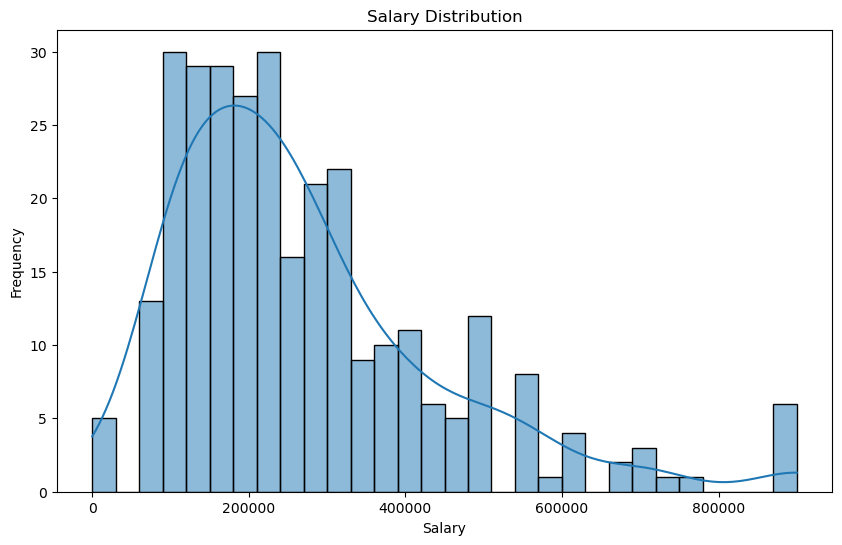

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salaries'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

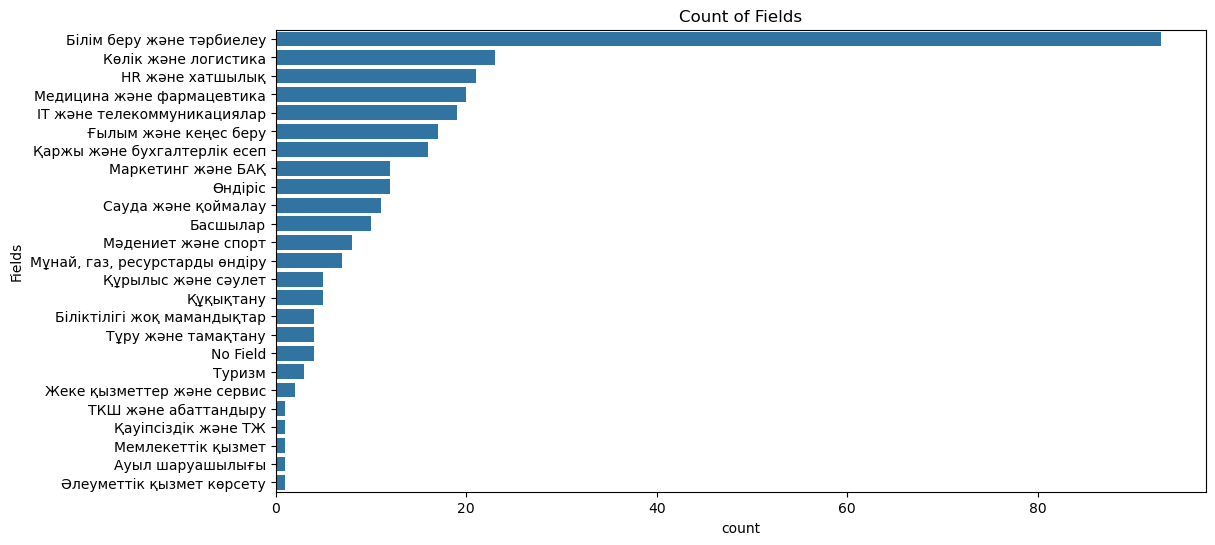

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Fields', data=data, order=count_field.index)
plt.title('Count of Fields')
plt.show()

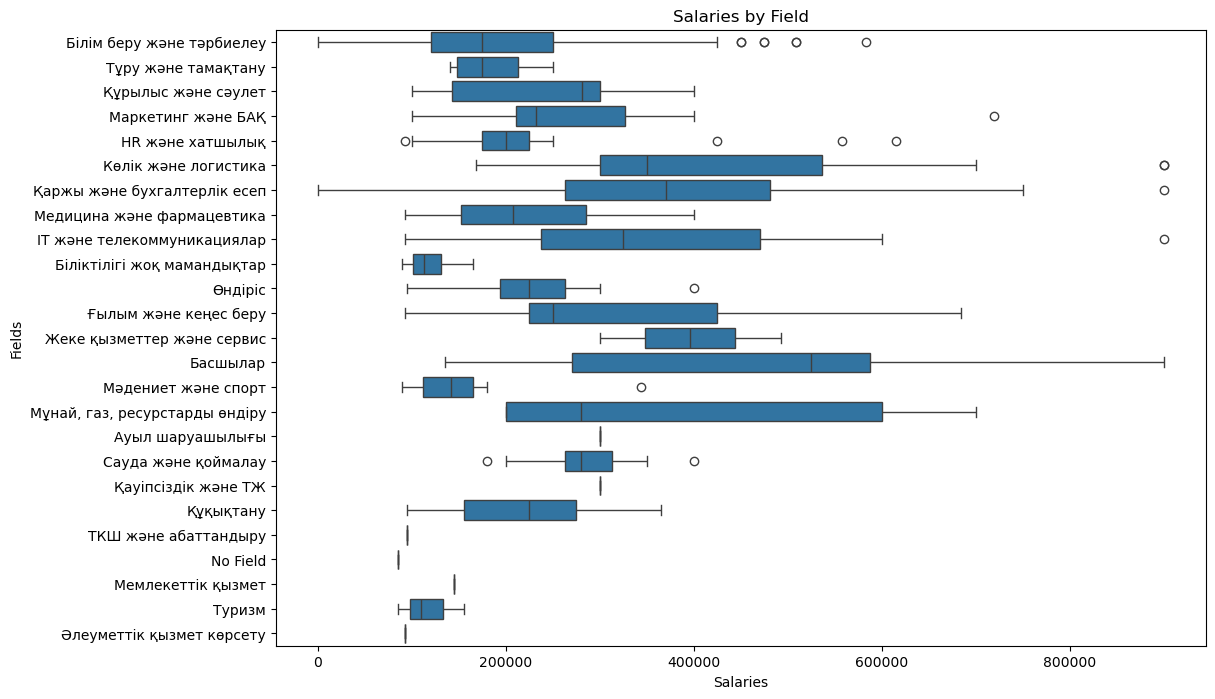

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salaries', y='Fields', data=data)
plt.title('Salaries by Field')
plt.show()

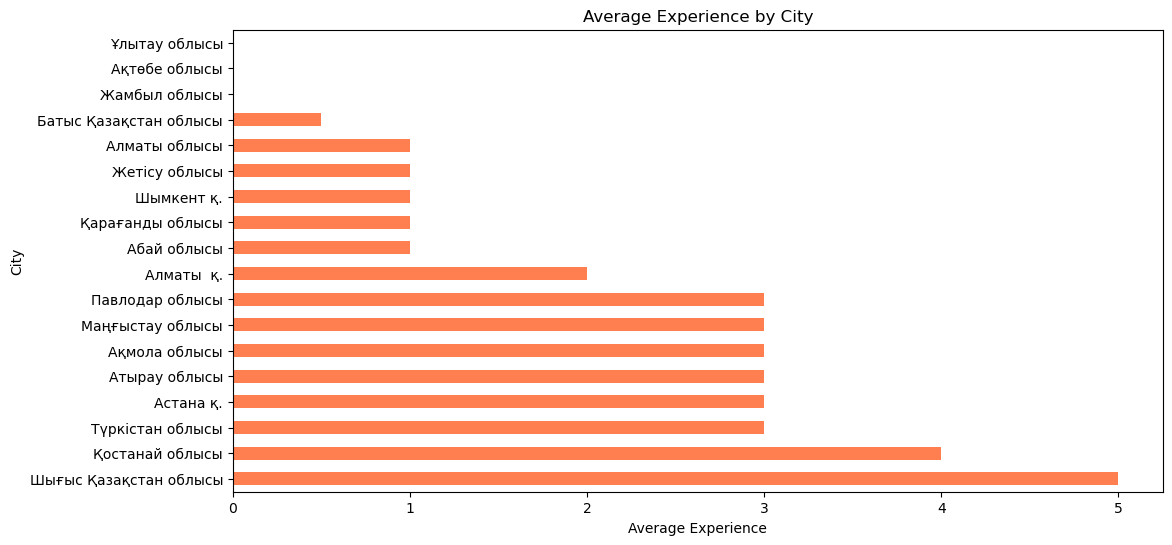

In [18]:
plt.figure(figsize=(12, 6))
avg_exp_by_city.plot(kind='barh', color='coral')
plt.title('Average Experience by City')
plt.xlabel('Average Experience')
plt.ylabel('City')
plt.show()

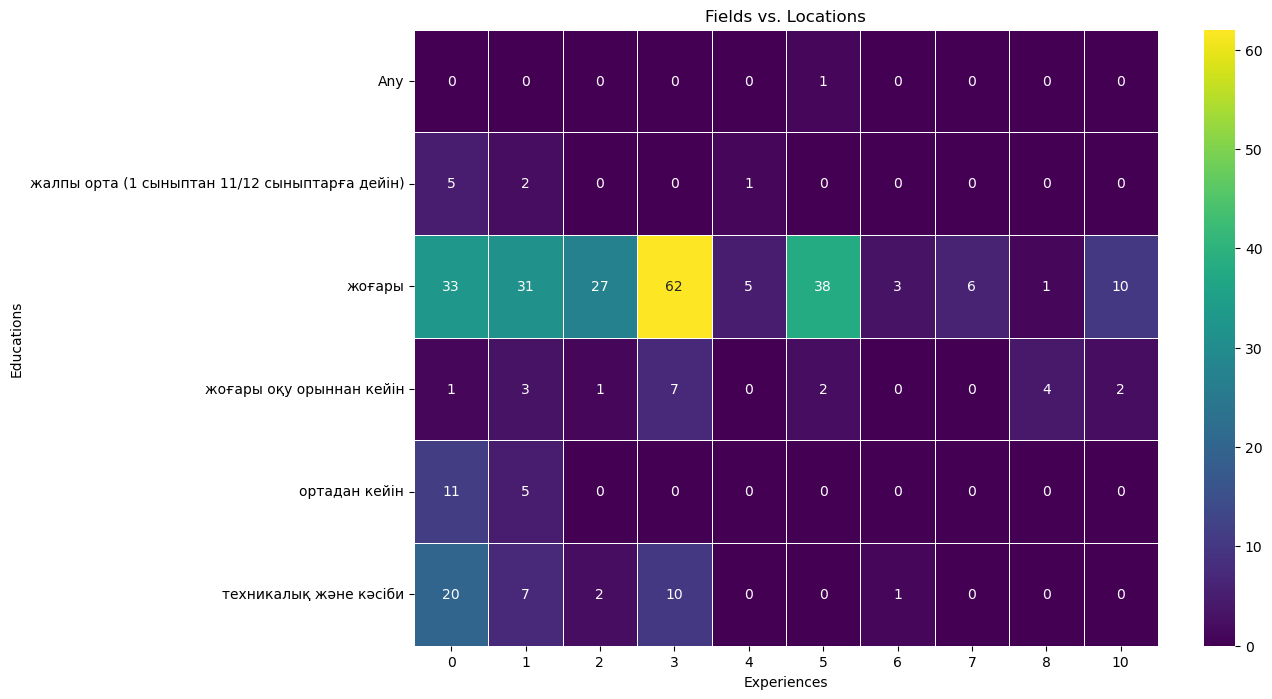

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(fields_locations, annot=True, fmt='d', cmap='viridis', linewidths=0.5)
plt.title('Fields vs. Locations')
plt.show()

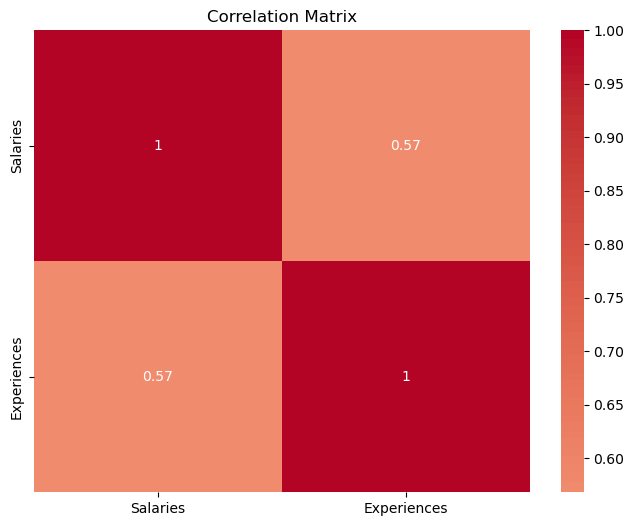

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()